In [3]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd

# Load the dataset from a local CSV file
df = pd.read_csv('/content/Clean_Dataset.csv')

df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [7]:
import numpy as np

for column in df.columns:
    if df[column].dtype == 'float64':
        df[column] = df[column].astype(np.float32)
    elif df[column].dtype == 'int64':
        df[column] = df[column].astype(np.int32)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float32
 9   days_left         300153 non-null  int32  
 10  price             300153 non-null  int32  
dtypes: float32(1), int32(2), object(8)
memory usage: 21.8+ MB


In [8]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830002,49.000000,123071.000000


In [9]:
missing_values = df.isnull().sum()
print(missing_values)


airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [10]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))


Number of duplicate rows: 0


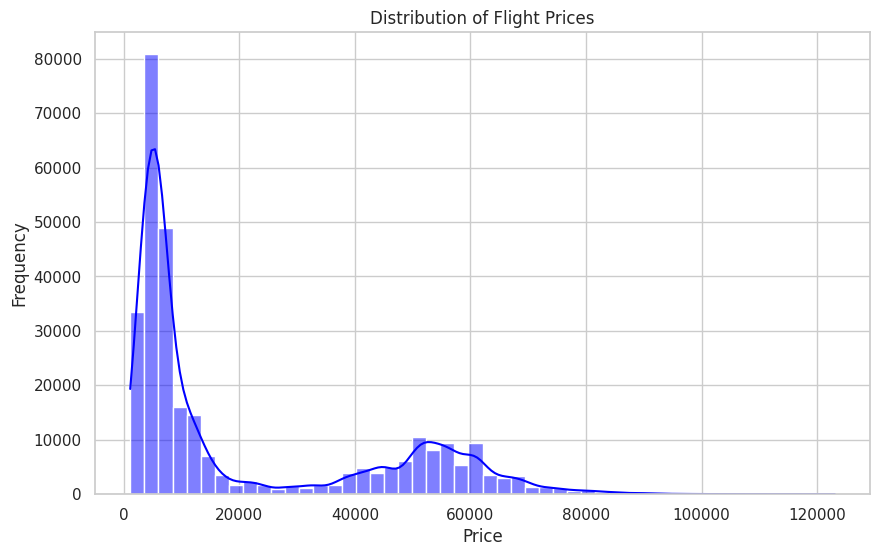

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Price Distribution Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='blue')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


**Observations from the Graph:**

**Skewness:** The distribution of flight prices is right-skewed, indicating that most of the flight prices are clustered towards the lower end of the scale, but there are a few relatively expensive flights.

**Primary Mode:** The most frequent price range appears to be just under 10,000, suggesting this is the most common price for flights within the dataset.

**Secondary Peaks:** There are noticeable secondary peaks around $40,000 and just under $100,000. These peaks could represent premium or luxury flight options, or perhaps flights to particularly distant or popular destinations.

**Tail of Distribution:** The long tail extending towards the higher price range ($100,000 and beyond) suggests that while expensive flights are less common, there is a significant variety in how high flight prices can go.

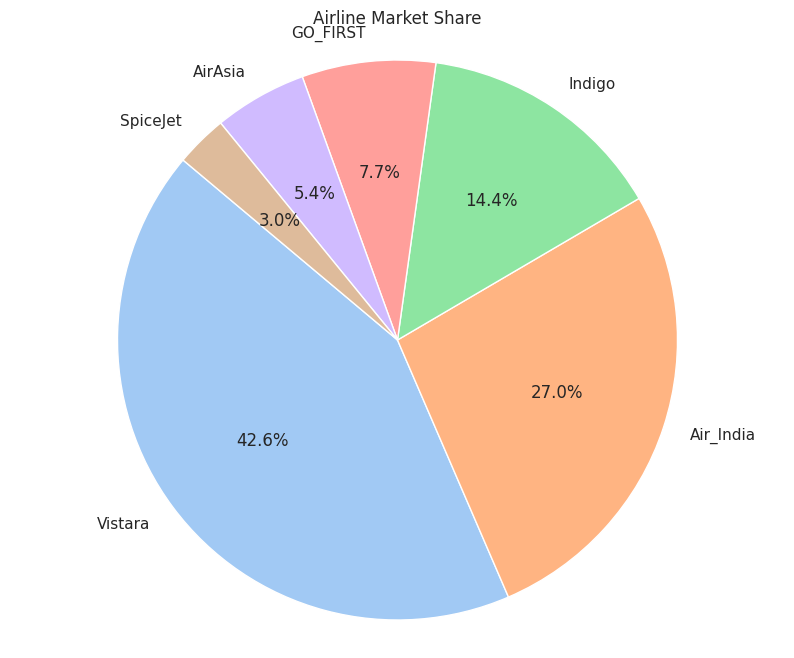

In [12]:
# Airline Market Share Pie Chart
airline_counts = df['airline'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(airline_counts, labels=airline_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Airline Market Share')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


**Analysis of the Airline Market Shares:**

**Vistara:** Holds the largest share of the market at 42.6%. This dominance suggests Vistara is a leading choice among travelers, possibly due to its routes, service quality, or pricing strategies.

**Air India**: The second largest, with 27.0% of the market share, indicating that it remains a significant player in the airline industry, possibly due to its historical presence and government backing.

**Indigo:** Captures 14.4% of the market, placing it as a substantial but smaller competitor compared to Vistara and Air India. Its positioning might appeal to specific consumer segments.

**SpiceJet and Others:** SpiceJet, at 5.4%, followed by AirAsia at 3.0%, and GO_FIRST at 7.7%, represent smaller segments of the market. These shares suggest they cater to niche markets or compete on specific routes or price points.

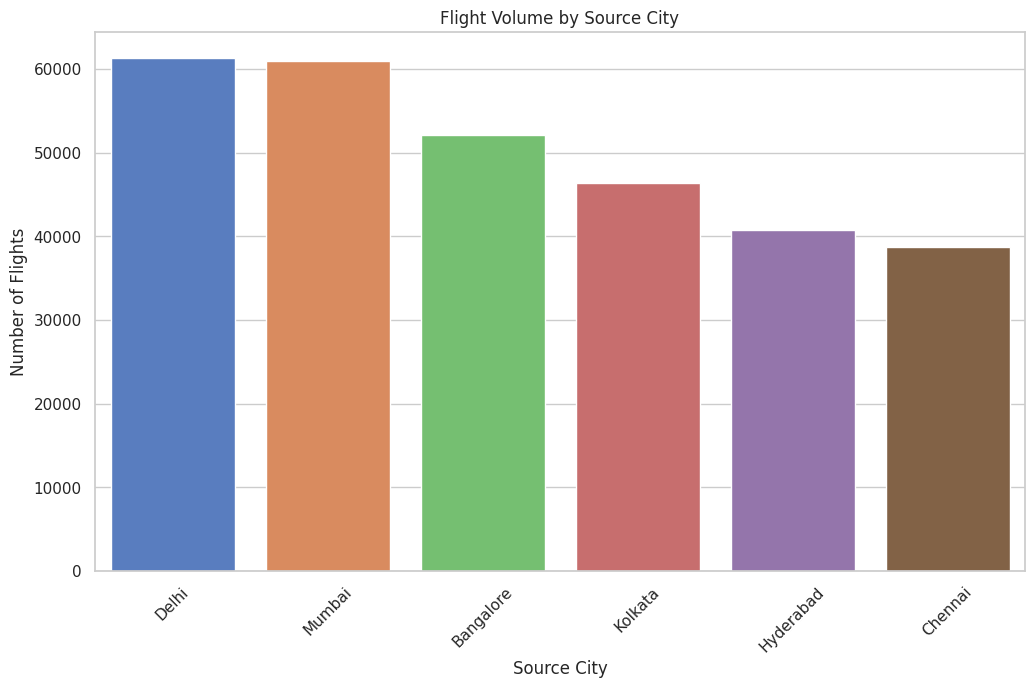

In [13]:
# Flight Volume by Source City Bar Chart
source_city_counts = df['source_city'].value_counts()
plt.figure(figsize=(12, 7))
sns.barplot(x=source_city_counts.index, y=source_city_counts, palette='muted')
plt.title('Flight Volume by Source City')
plt.xlabel('Source City')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()


Observations from the Chart:

**Delhi and Mumbai:** These two cities have the highest number of flights, both close to 60,000. This high volume likely reflects their roles as major economic and transportation hubs in the country.

**Bangalore and Kolkata:** Both cities have a significant number of flights, roughly around 50,000 each. Bangalore's prominence as a tech hub and Kolkata's historical significance and population might contribute to these numbers.

**Hyderabad and Chennai:** These cities show a slightly lower flight volume compared to the others, each with around 40,000 flights. These figures still indicate their importance as central travel points in their respective regions.

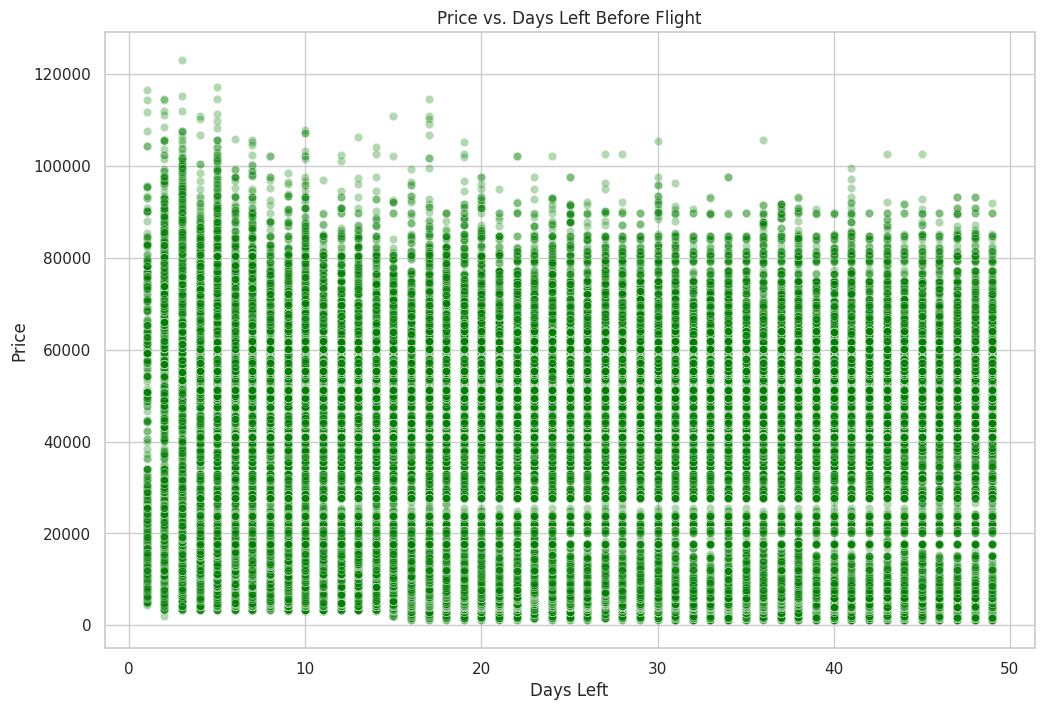

In [14]:
# Price vs. Days Left Scatter Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='days_left', y='price', data=df, alpha=0.3, color='green')
plt.title('Price vs. Days Left Before Flight')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.show()


**Key Observations from the Plot:**

**Price Variability:** There is a wide range of prices across the number of days left before the flight. Prices vary from low to high without a clear pattern of increase or decrease as the departure date approaches.

**High Price Points:** There are flights with very high prices scattered throughout the range of days, suggesting that certain flights remain expensive regardless of how far in advance they are booked.

**Clusters:** Prices are densely packed at certain levels, indicating common pricing tiers utilized by airlines. These clusters do not show a definitive trend related to the days left, which implies that other factors such as flight demand, route popularity, or airline pricing strategies might be influencing the pricing more than the booking lead time.

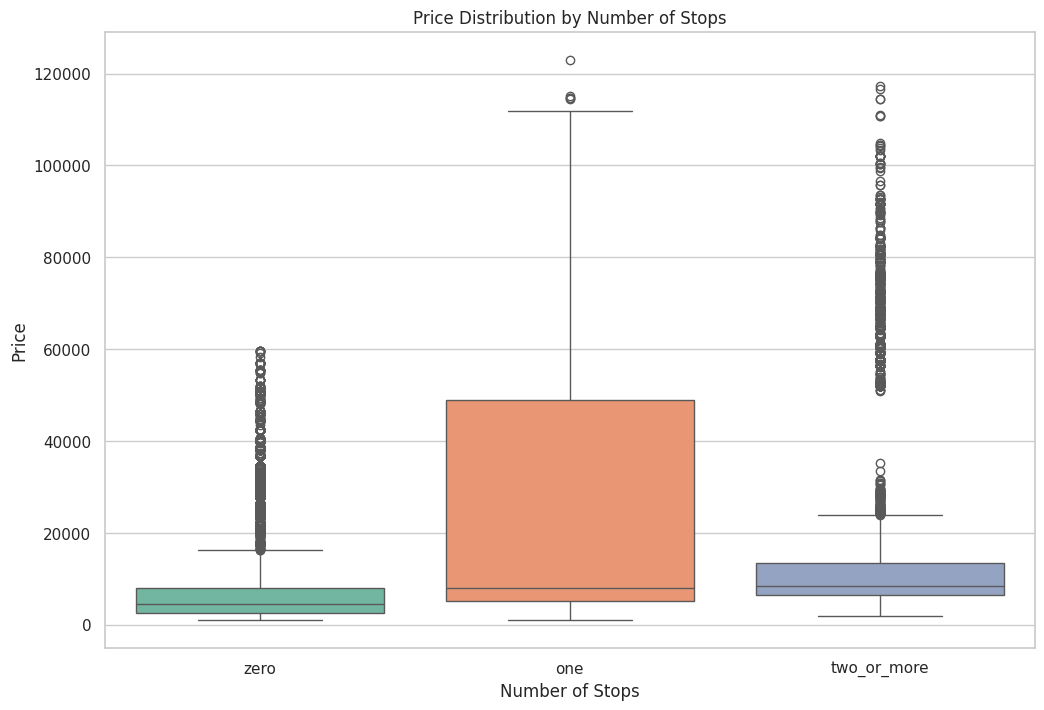

In [15]:
# Stops and Price Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='stops', y='price', data=df, palette='Set2')
plt.title('Price Distribution by Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Price')
plt.show()


**Key Observations from the Plot:**

**Non-Stop Flights (Zero Stops):** These flights have the lowest price range and the smallest interquartile range (IQR), indicating less variability in prices. The majority of prices are concentrated at the lower end, with some outliers indicating more expensive direct flights.

**One Stop:** This category shows a much higher median price and a larger IQR, suggesting greater variability in the prices of one-stop flights. The range extends significantly higher than the zero-stop flights, with several outliers indicating that some one-stop flights can be very expensive.

**Two or More Stops:** Interestingly, the median price for flights with two or more stops is lower than for one-stop flights, and the IQR is also narrower, suggesting less variability. However, there is a notable spread of lower prices and a few high-priced outliers.

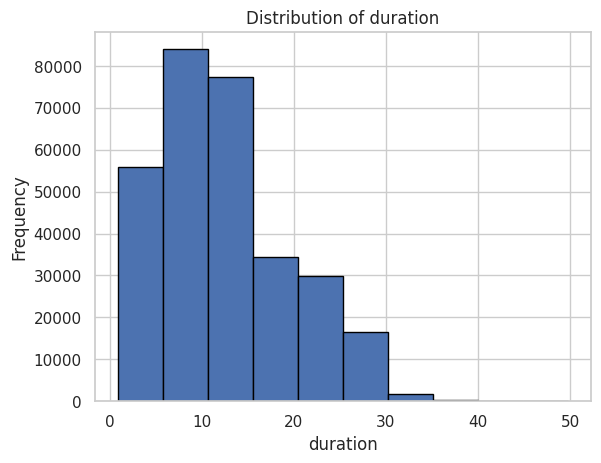

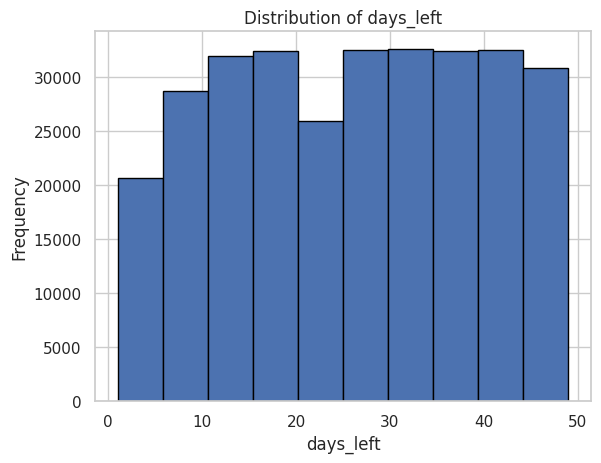

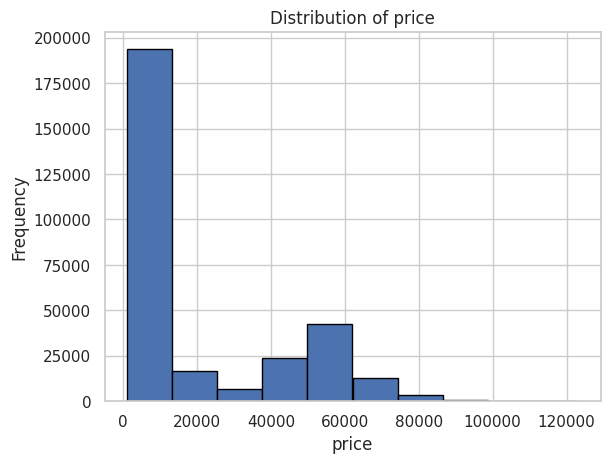

In [16]:
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int32', 'float32']).columns

# Plot distribution of each numerical column
for column in numerical_columns:
    plt.hist(df[column], bins=10, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


**Distribution of Flight Duration**

**Shape and Trend:** The histogram shows a right-skewed distribution with most flights having shorter durations, peaking at 10-15 hours. The frequency then gradually decreases as the duration increases.

**Implications:** This suggests that shorter flights are more common, which could be due to the prevalence of domestic or short-haul international flights. Airlines may prioritize these routes due to higher demand or profitability.

**Distribution of Days Left Before Flight**

**Shape and Trend:** This distribution is somewhat uniform but slightly right-skewed, with frequencies gradually increasing from 0 days left to about 30-35 days, then stabilizing around 25,000 to 30,000 flights until it peaks again slightly around 40-45 days.

**Implications:** This might indicate booking patterns where a significant number of bookings occur both well in advance (30-45 days) and at the last minute. This can help airlines adjust pricing strategies or promotions based on booking timelines.

**Distribution of Price**

**Shape and Trend:** The price distribution is strongly right-skewed with a significant peak at lower prices (below 20,000) and smaller peaks around 40,000 and 80,000.

**Implications:** The large peak at the lower price range suggests that most flights are relatively affordable, with fewer flights in the higher price ranges, likely corresponding to longer or more premium service offerings. This could reflect a broader market focus on budget to mid-range travel options.

**Combined Insights**

**Flight Duration and Price Relationship:** Shorter, more frequent flights are generally cheaper, aligning with the peak of lower prices in the price distribution. Longer flights, which are less frequent, may correspond to the higher price outliers.

**Booking Patterns and Flight Prices:** With a stable booking rate around 30-45 days before flight (as shown in the days left distribution), this might be an optimal time for promotions or price adjustments to capture bookings before traveler commitment drops.

**Strategic Implications:** Airlines can use this data to better understand consumer preferences and adjust their route planning, pricing strategies, and promotional efforts to maximize occupancy and revenue.

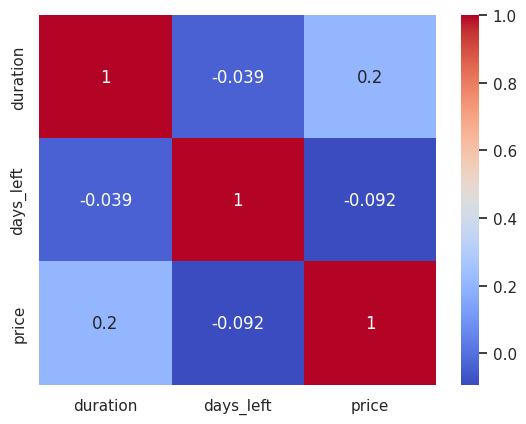

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int32', 'float32']).columns

# Create a correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [18]:
print(df['stops'].unique())


['zero' 'one' 'two_or_more']


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Selecting features and target variable
features = df.drop('price', axis=1)
target = df['price']

# Encoding categorical variables
categorical_features = features.select_dtypes(include=['object']).columns.tolist()
encoder = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_features)], remainder='passthrough')

features_encoded = encoder.fit_transform(features)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((240122, 1598), (60031, 1598))

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Training the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicting on the testing set
y_pred_linear = linear_model.predict(X_test)

# Evaluating the Linear Regression model
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)
linear_rmse = mean_squared_error(y_test, y_pred_linear, squared=False)


In [21]:
# Print metrics
print("Mean Absolute Error (MAE):", linear_mae)
print("Mean Squared Error (MSE):", linear_mse)
print("Root Mean Squared Error (RMSE):", linear_rmse)
print("R-squared (Coefficient of Determination):", linear_r2)


Mean Absolute Error (MAE): 4254.832935115765
Mean Squared Error (MSE): 38409361.97444502
Root Mean Squared Error (RMSE): 6197.528698960984
R-squared (Coefficient of Determination): 0.9254884911783233


In [22]:
from sklearn.tree import DecisionTreeRegressor

# Training the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predicting on the testing set
y_pred_tree = tree_model.predict(X_test)

# Evaluating the Decision Tree model
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_mae = mean_absolute_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)
tree_rmse = mean_squared_error(y_test, y_pred_tree, squared=False)

In [23]:
# Print metrics
print("Mean Absolute Error (MAE):", tree_mae)
print("Mean Squared Error (MSE):", tree_mse)
print("Root Mean Squared Error (RMSE):", tree_rmse)
print("R-squared (Coefficient of Determination):", tree_r2)


Mean Absolute Error (MAE): 880.6169978844264
Mean Squared Error (MSE): 8889112.541178724
Root Mean Squared Error (RMSE): 2981.4614773930457
R-squared (Coefficient of Determination): 0.9827557357508414


In [24]:
import gc
collected_objects = gc.collect()
print(f"Garbage collector: collected {collected_objects} objects.")


Garbage collector: collected 17385 objects.


In [25]:
df = df.sample(frac=0.1, random_state=42)
# Selecting features and target variable
features = df.drop('price', axis=1)
target = df['price']

# Encoding categorical variables
categorical_features = features.select_dtypes(include=['object']).columns.tolist()
encoder = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_features)], remainder='passthrough')

features_encoded = encoder.fit_transform(features)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

In [26]:
from sklearn.ensemble import RandomForestRegressor
# Training the Random Forest model
forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
forest_model.fit(X_train, y_train)

# Predicting on the testing set
y_pred_forest = forest_model.predict(X_test)

# Evaluating the Random Forest model
forest_mse = mean_squared_error(y_test, y_pred_forest)
forest_mae = mean_absolute_error(y_test, y_pred_forest)
forest_r2 = r2_score(y_test, y_pred_forest)
forest_rmse = mean_squared_error(y_test, y_pred_forest, squared=False)

In [27]:
# Print metrics
print("Mean Absolute Error (MAE):", forest_mae)
print("Mean Squared Error (MSE):", forest_mse)
print("Root Mean Squared Error (RMSE):", forest_rmse)
print("R-squared (Coefficient of Determination):", forest_r2)

Mean Absolute Error (MAE): 1438.9669817313563
Mean Squared Error (MSE): 10051078.116873356
Root Mean Squared Error (RMSE): 3170.3435329429767
R-squared (Coefficient of Determination): 0.9803385704923626
